## Data Exploration of HEPMASS Dataset

In [13]:
import os
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from typing import List, Tuple, Dict, Union

%matplotlib inline
sns.set()

In [2]:
from script import free_mem, set_random_seed
from script import utils 
from script.datasets.hepmass import Hepmass

In [3]:
set_random_seed(42)

Random seed 42 set.


---

Dataset loading

In [4]:
# unique mass values of the dataset
mass_values = [499.99997, 750.0, 1000.0, 1250.0, 1500.0]

In [5]:
data = Hepmass(x_scaler=None, m_scaler=None)
data.load(path=Hepmass.TRAIN_PATH)

free_mem()

data.ds.head()

loading...
dataset loaded.


,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


#### Overall View of the Dataset


In [6]:
bkg = data.ds[data.ds[data.columns['label']] == 0]
sig = data.ds[data.ds[data.columns['label']] == 1]

Histograms

In [10]:
def histogram(col: str, bins=None):
    plt.title(col)
    plt.hist(bkg[col], bins=bins, alpha=0.3, label='bkg', color='red')
    plt.hist(sig[col], bins=bins, alpha=0.7, label='sig', color='blue')
    plt.legend()

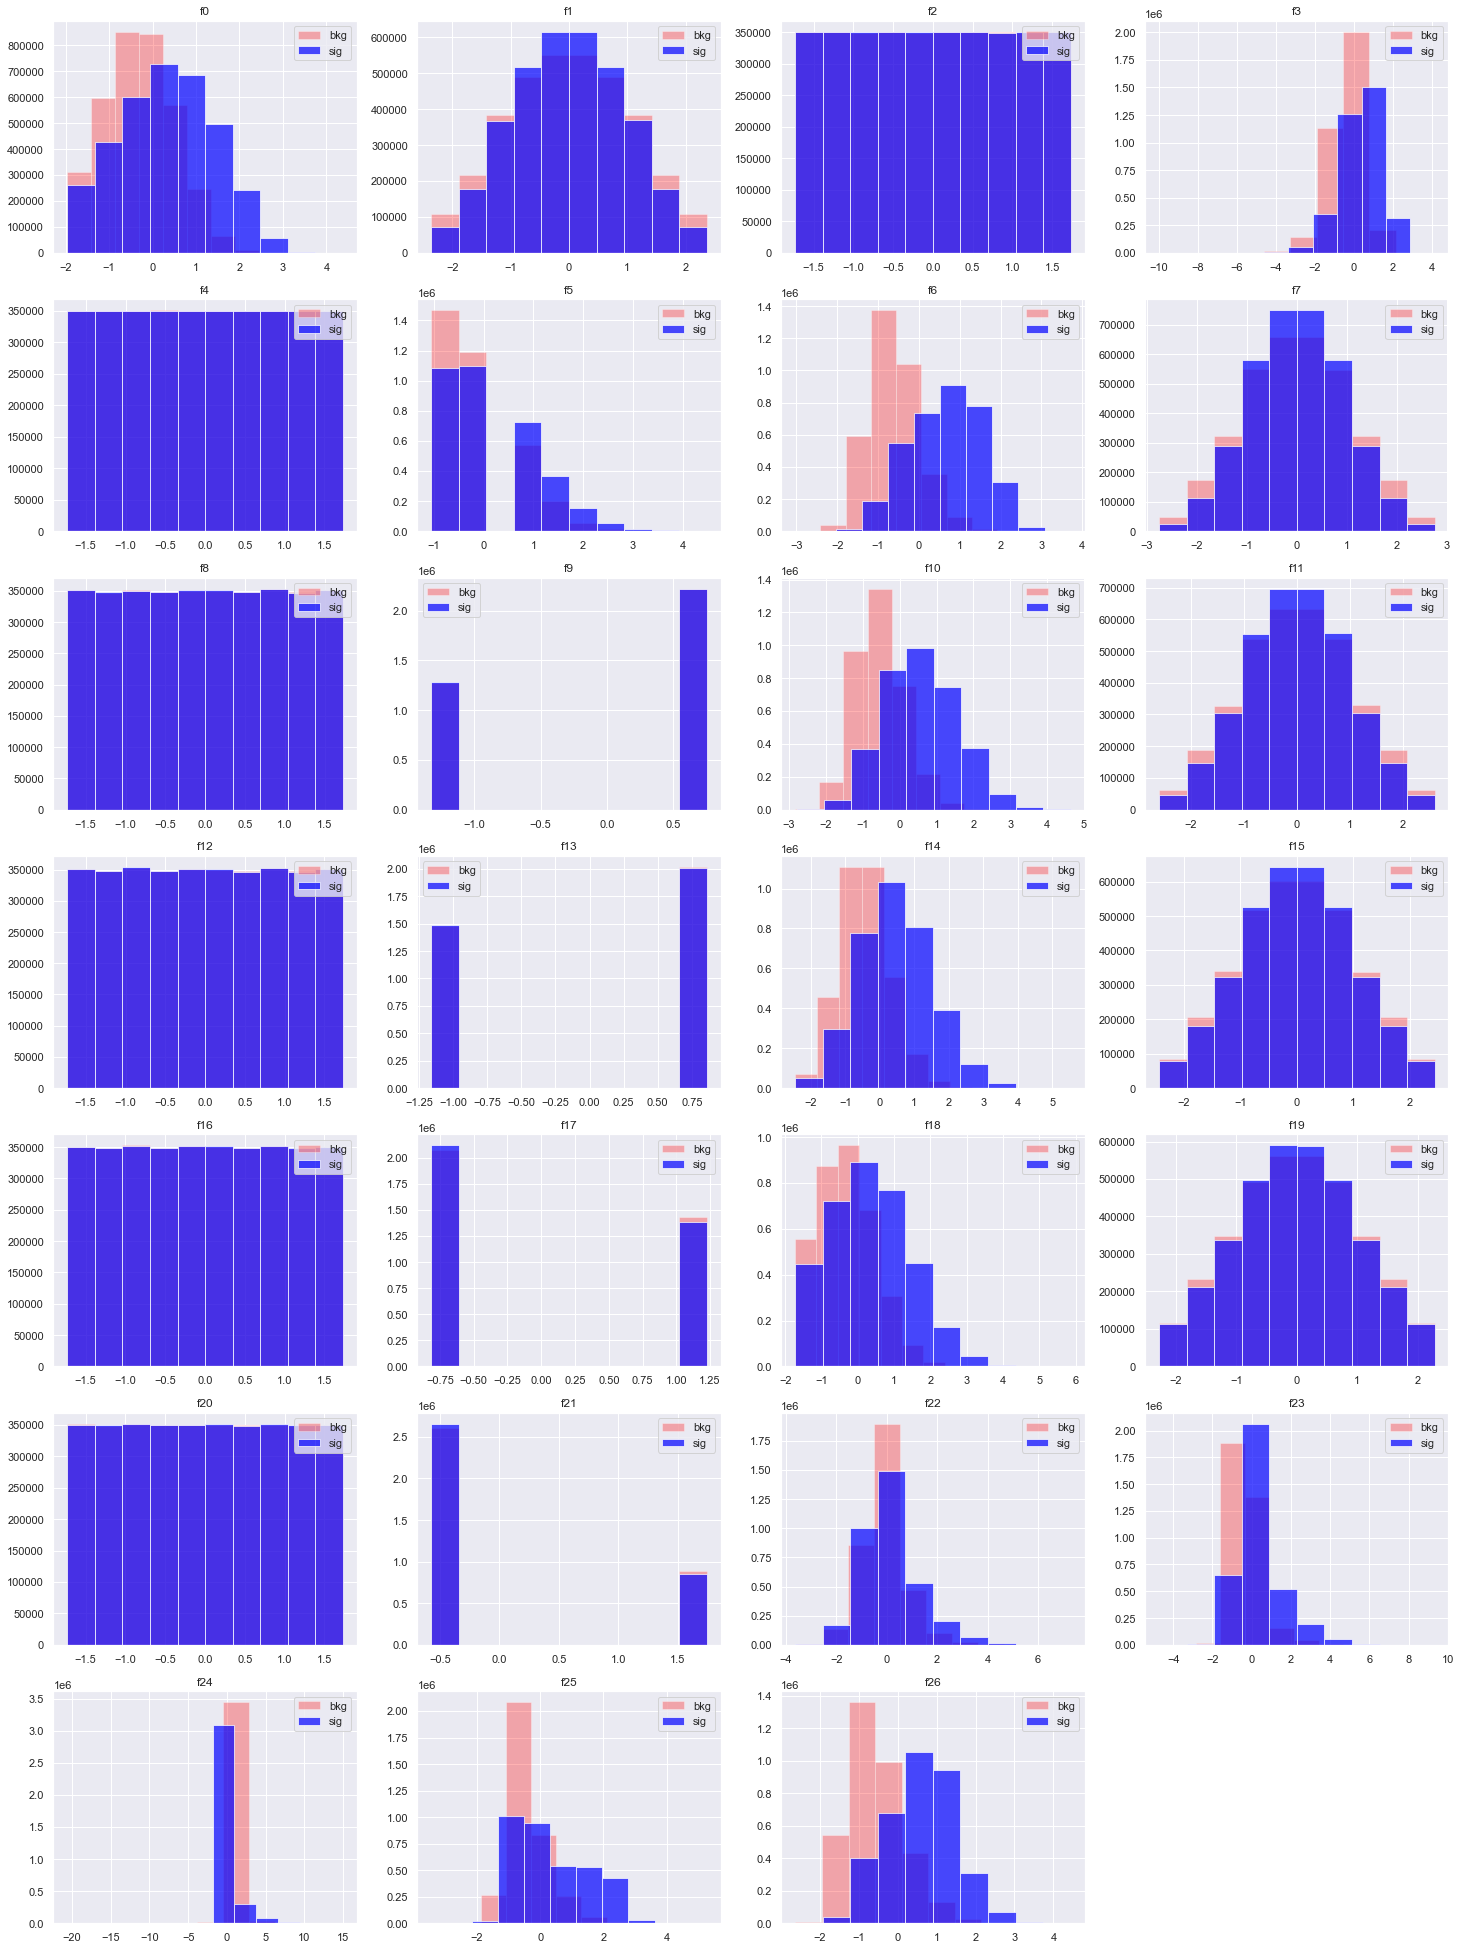

In [11]:
# compare feature distribution
plt.figure(figsize=(25, 35))

for i, col in enumerate(data.columns['feature']):
    plt.subplot(7, 4, i + 1)
    histogram(col)

Per-mass histograms

In [92]:
def histogram_per_mass(col: str, bins=None, figsize=(25, 5), **kwargs):
    fig, axes = plt.subplots(1, len(data.unique_mass), figsize=figsize)
    fig.suptitle(f'Feature {col}')
    
    for i, mass in enumerate(data.unique_mass):
        plt.subplot(1, len(data.unique_mass), i + 1)
        plt.xlabel(f'{math.ceil(mass)} mA')
        
        x_bkg = bkg.loc[bkg.mass == mass, col]
        x_sig = sig.loc[sig.mass == mass, col]
        
        plt.hist(x_bkg, bins=bins, alpha=0.3, label='bkg', color='red', **kwargs)
        plt.hist(x_sig, bins=bins, alpha=0.7, label='sig', color='blue', **kwargs)
        
    plt.legend(loc='best')


<ipython-input-92-b9f4ceb21cc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, len(data.unique_mass), figsize=figsize)


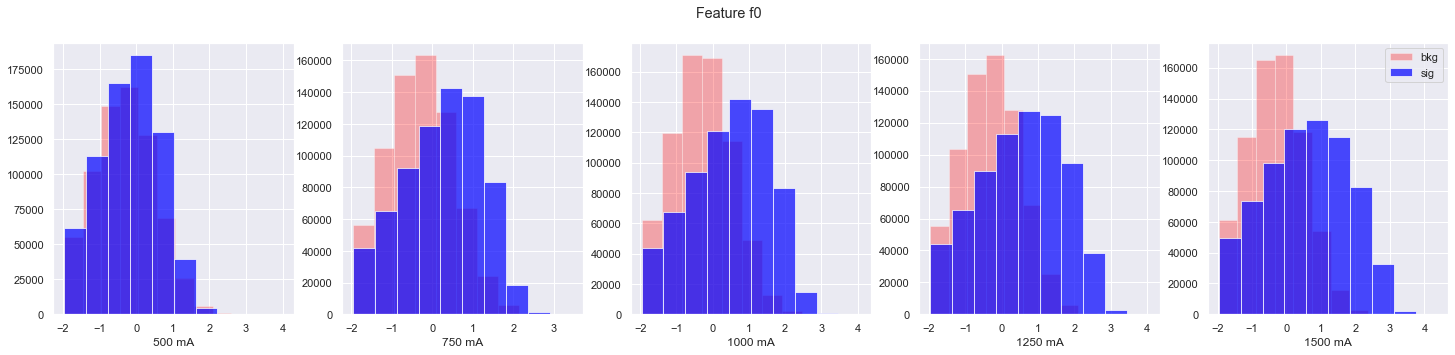

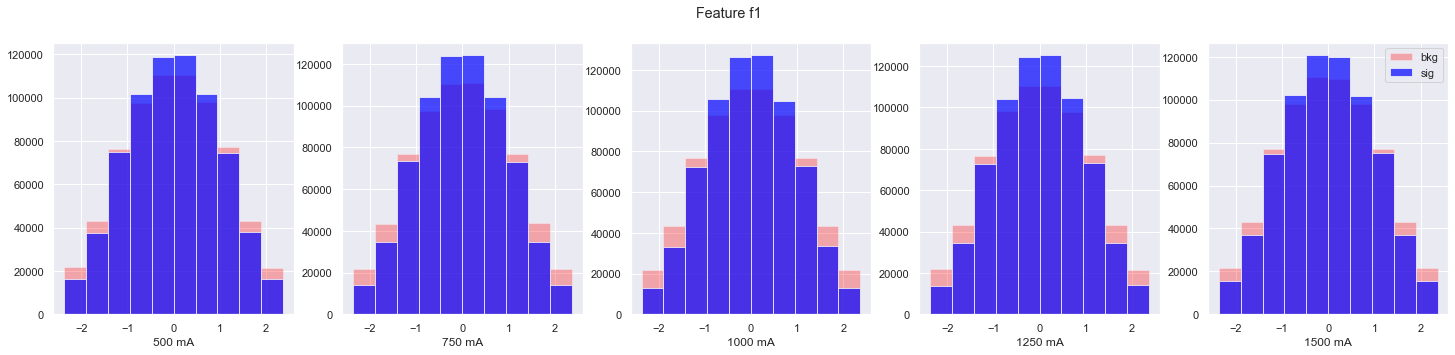

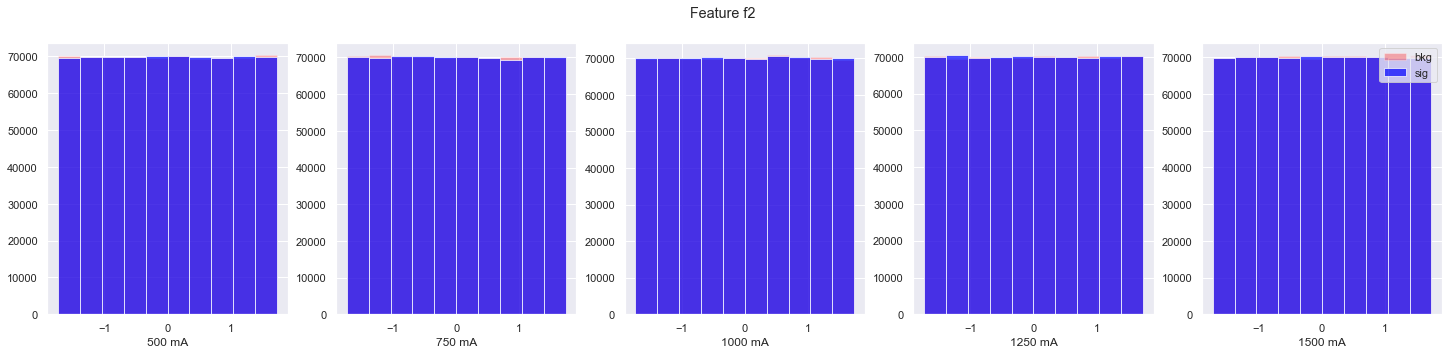

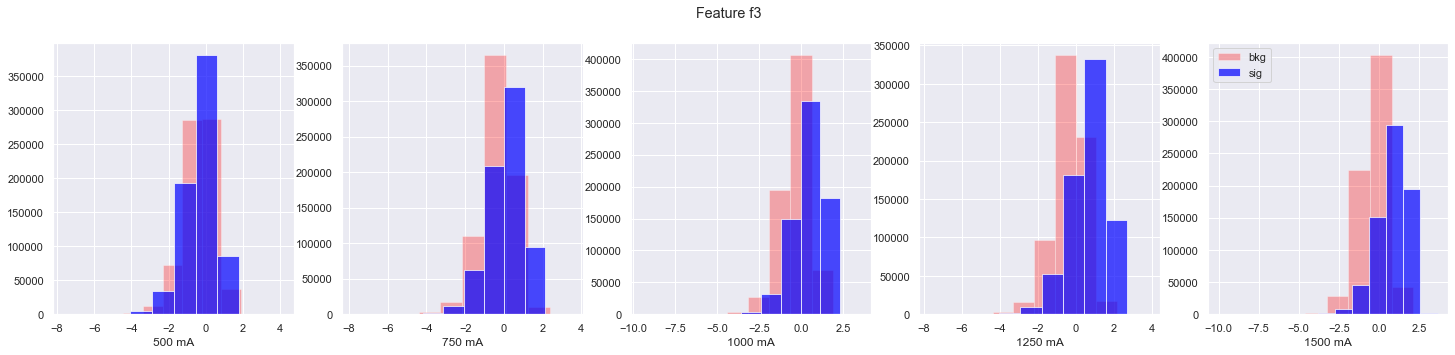

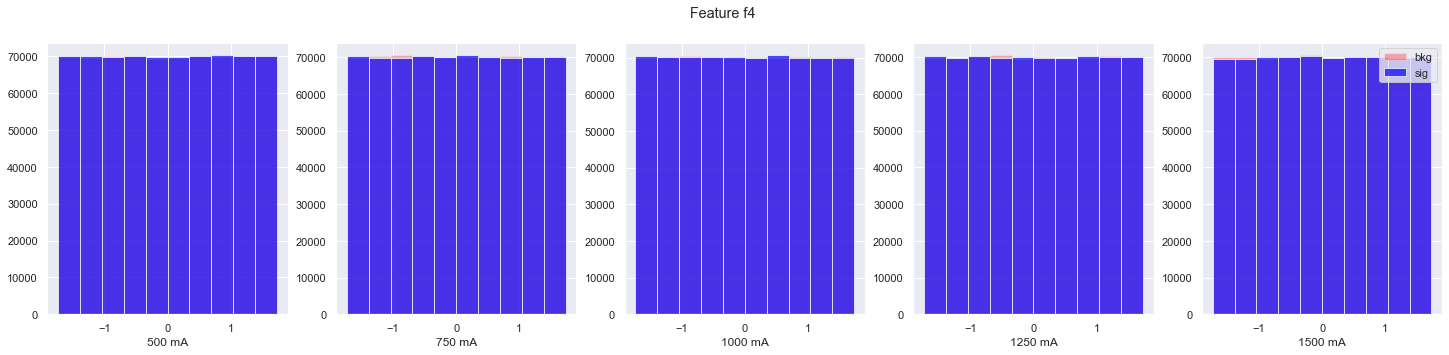

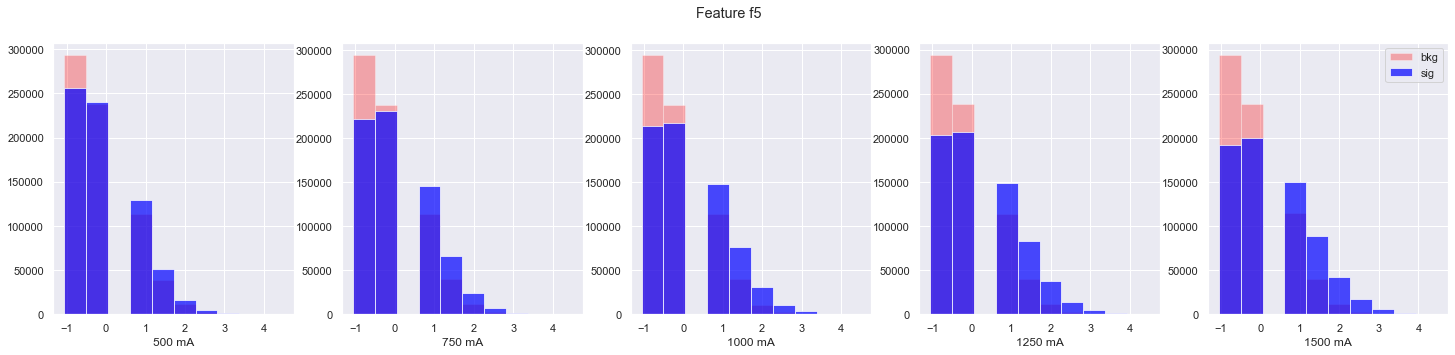

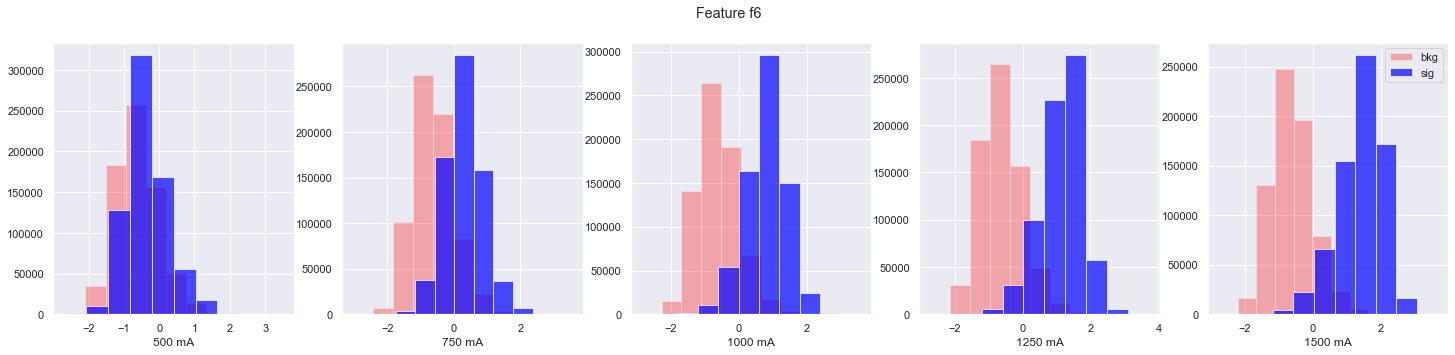

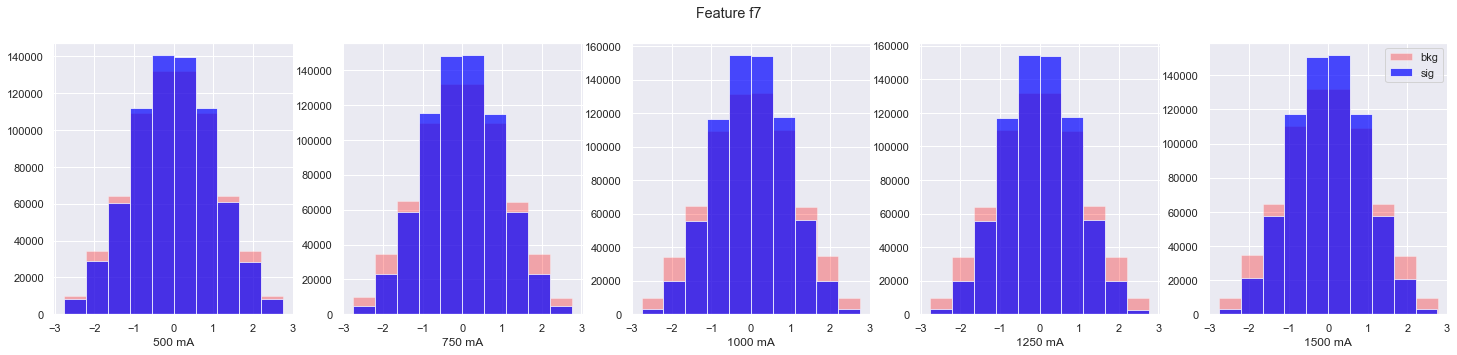

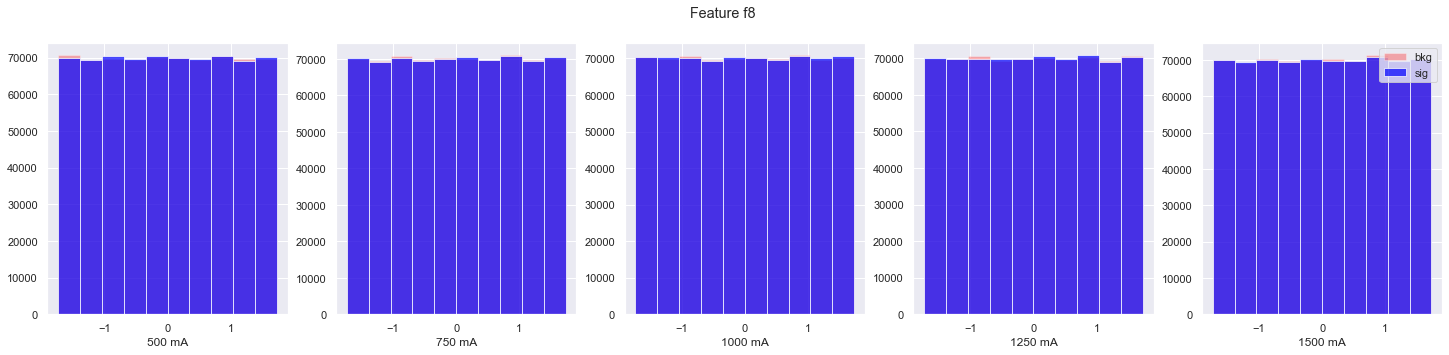

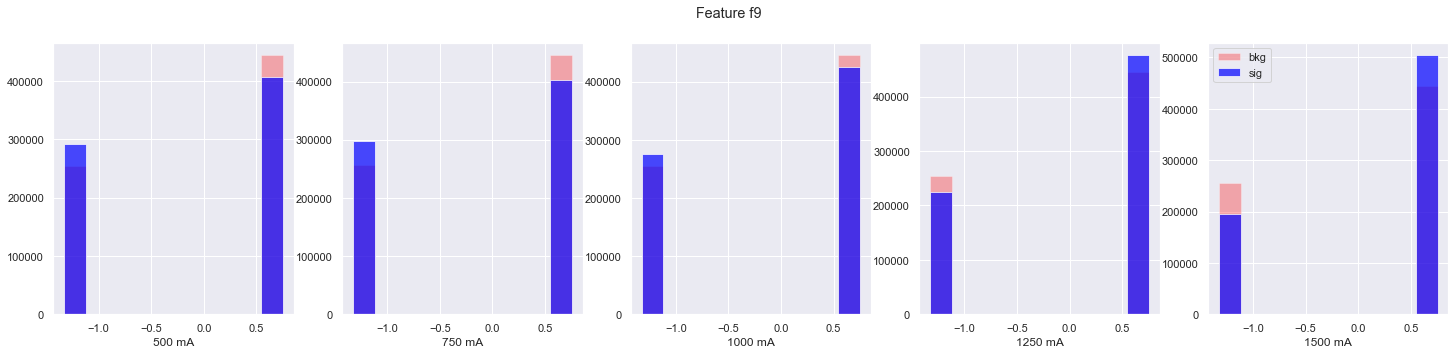

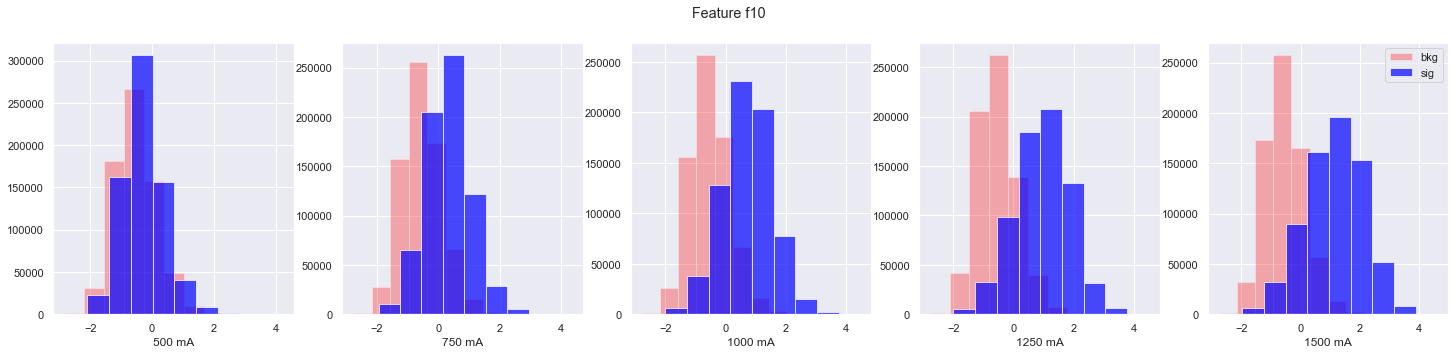

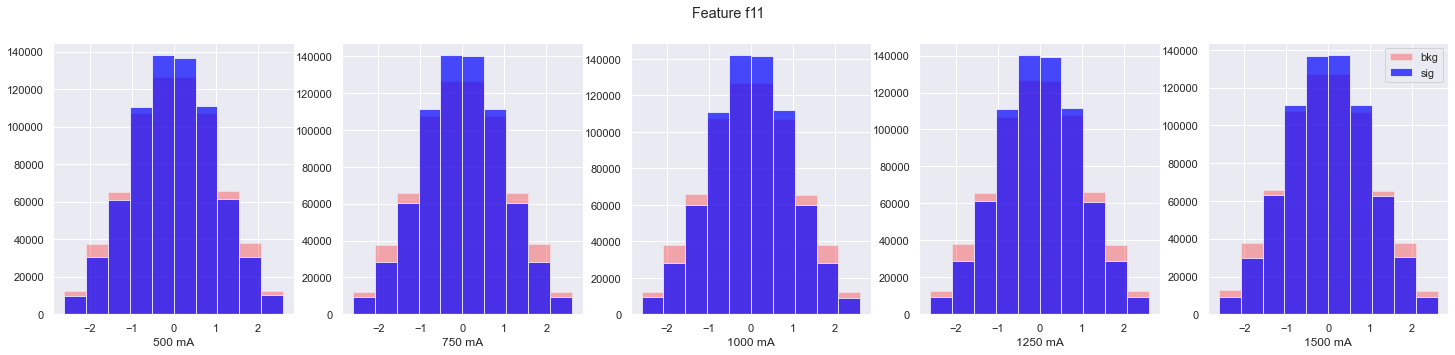

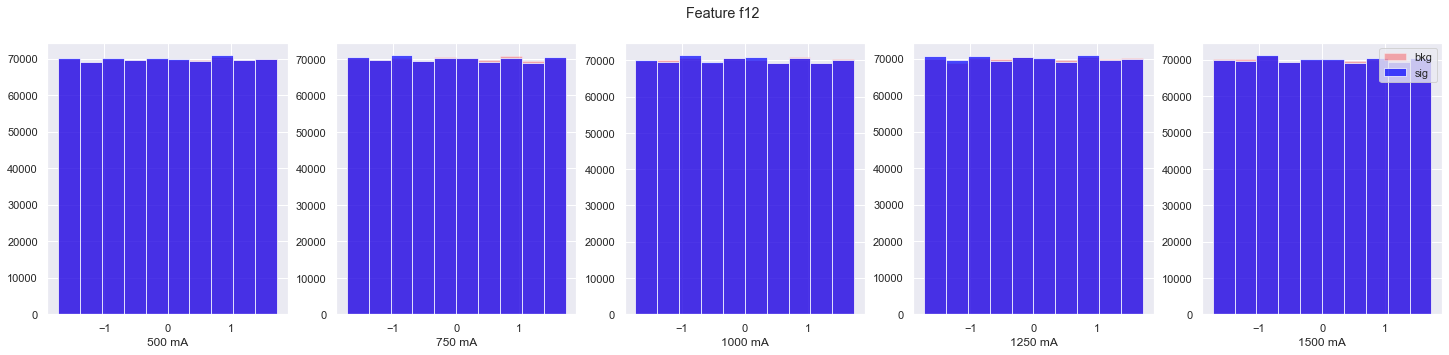

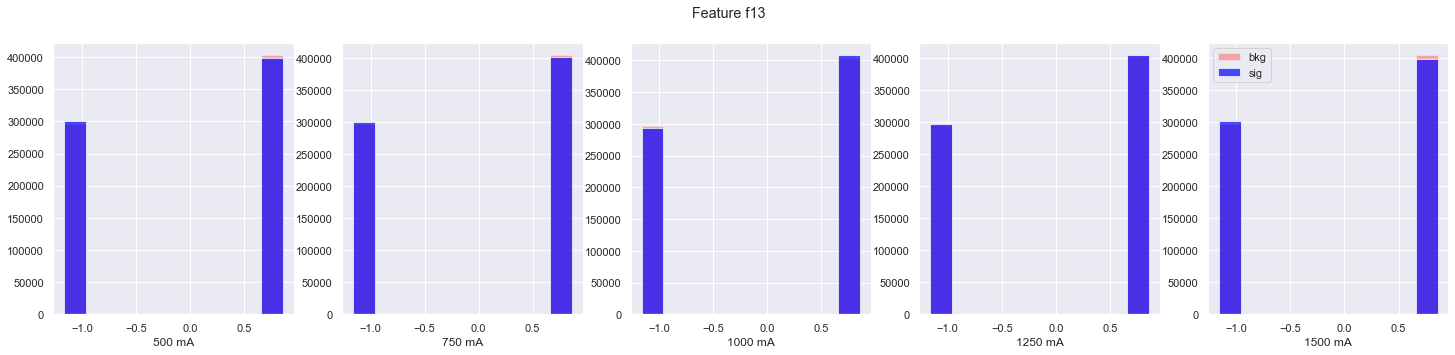

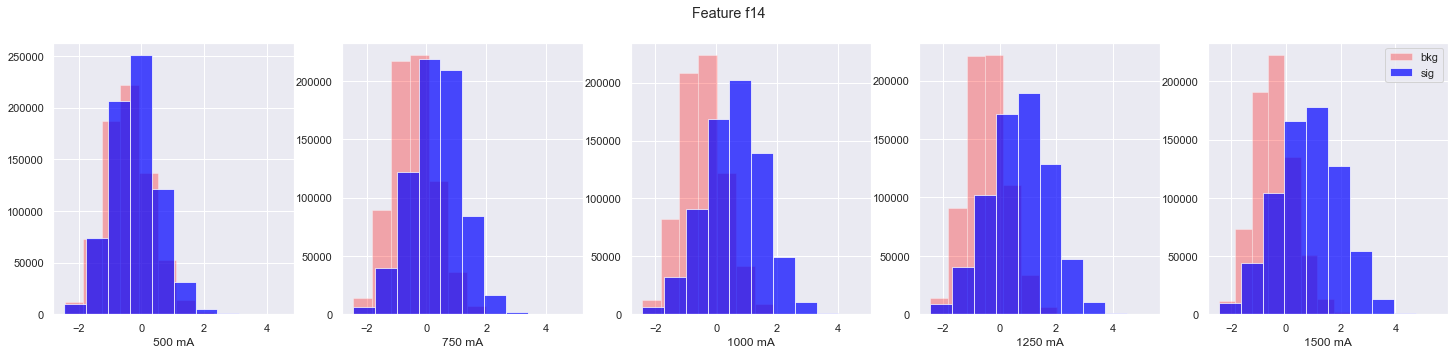

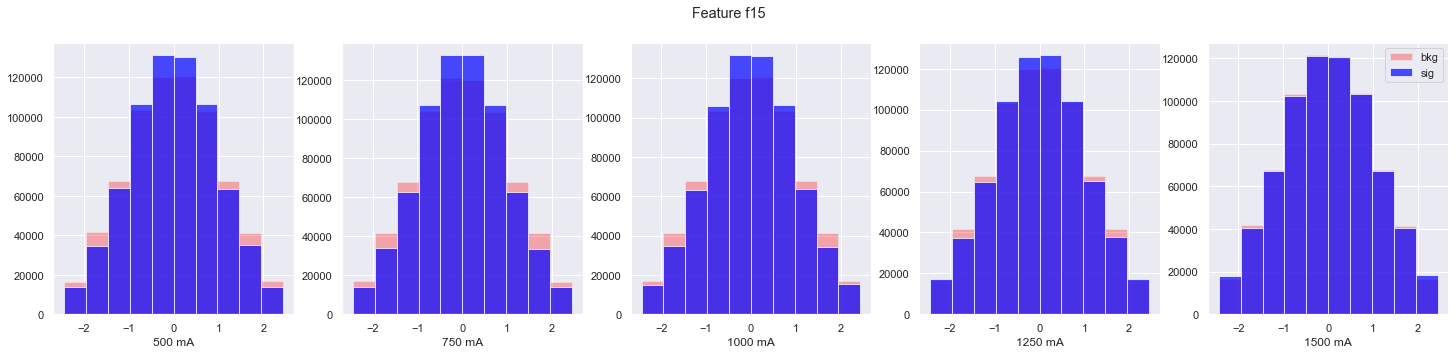

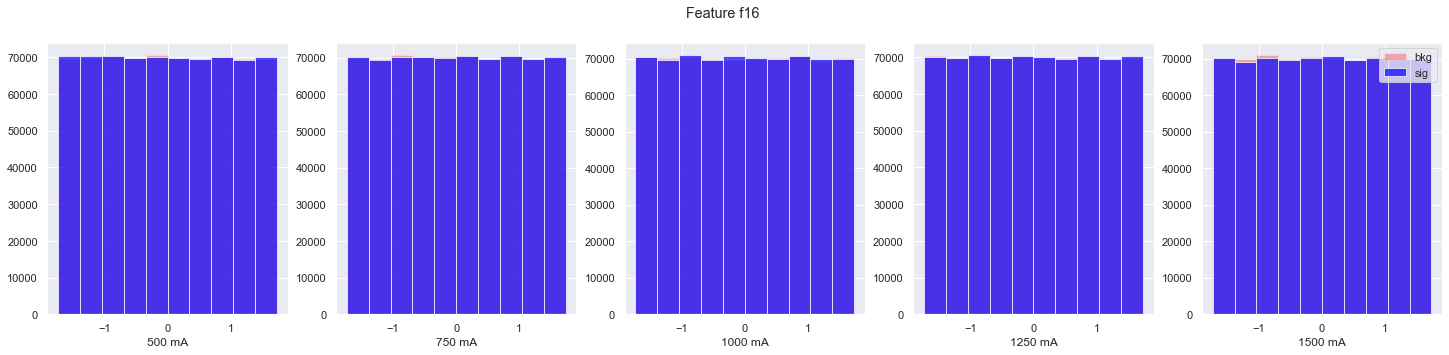

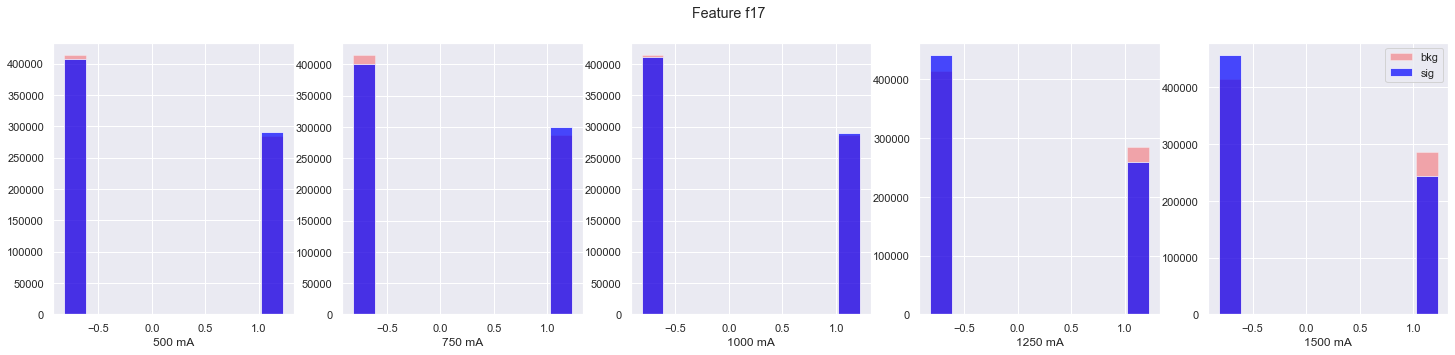

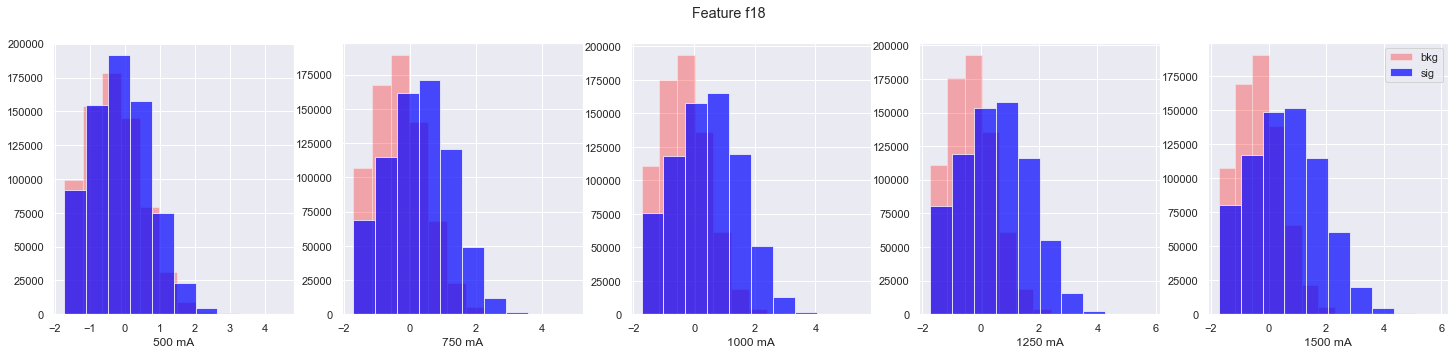

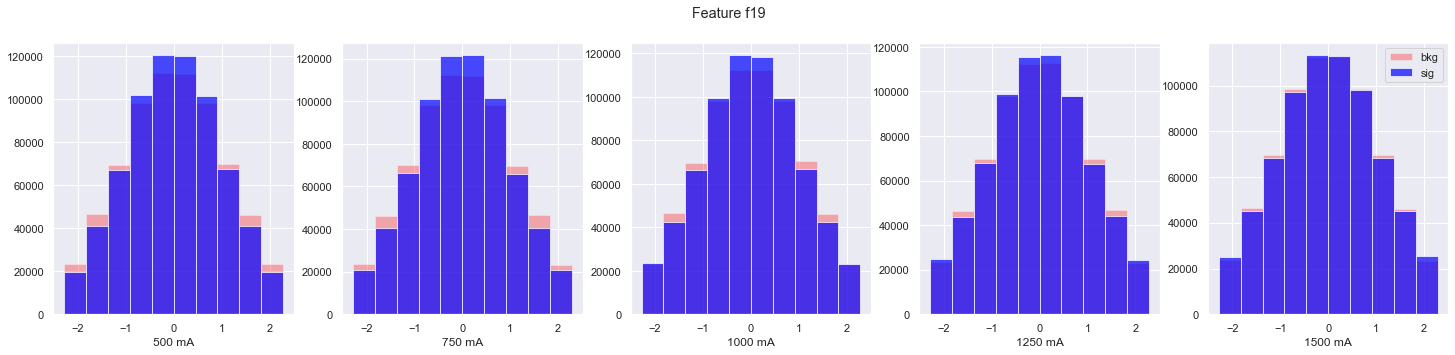

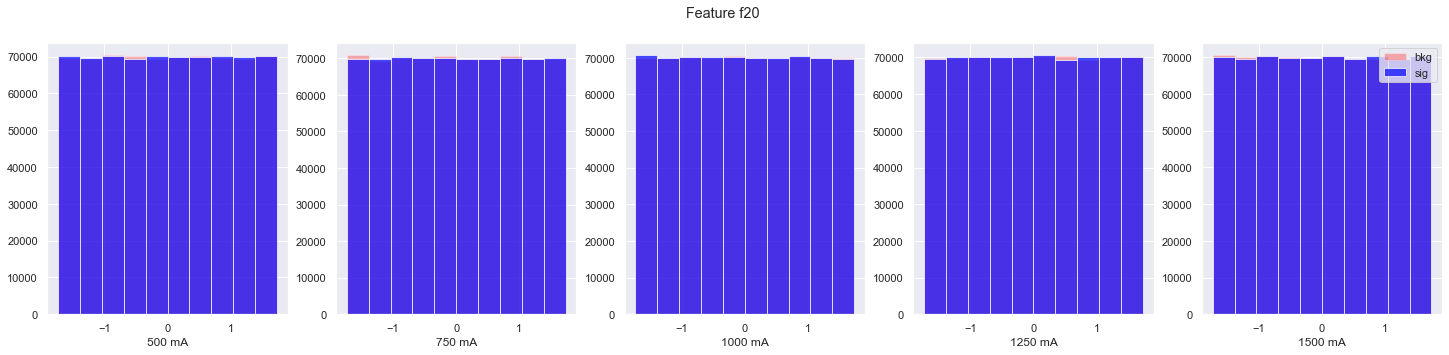

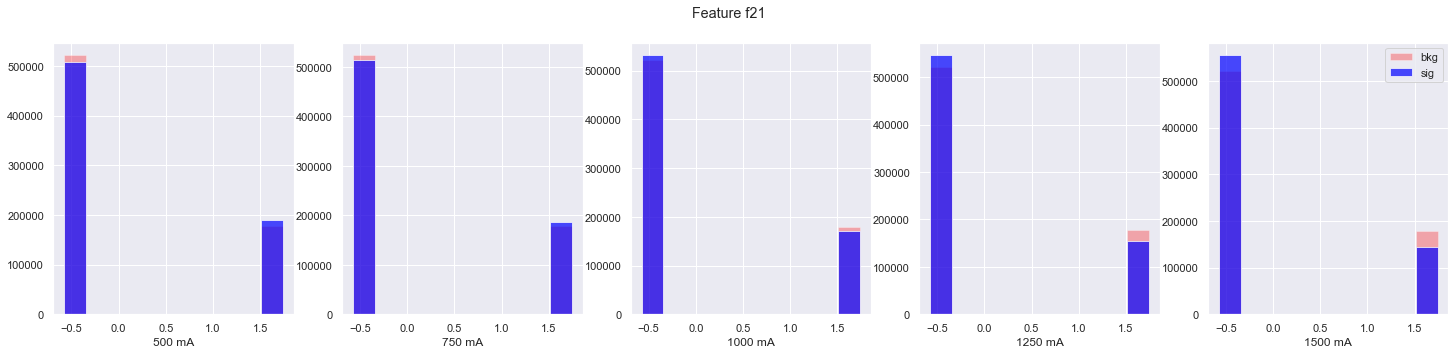

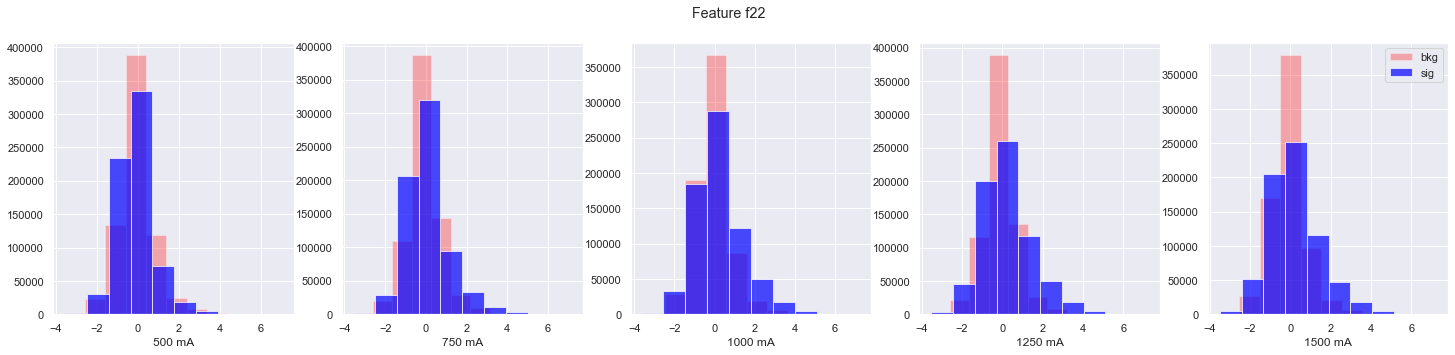

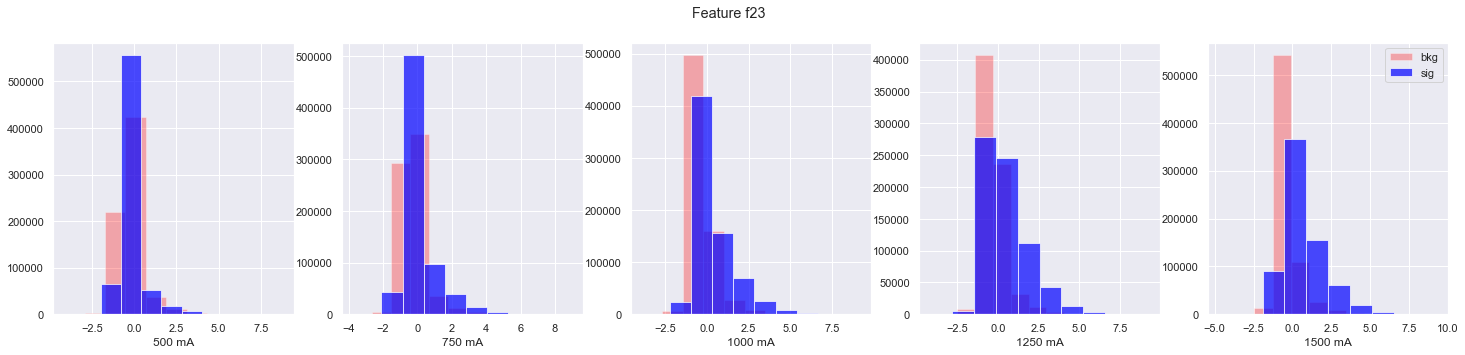

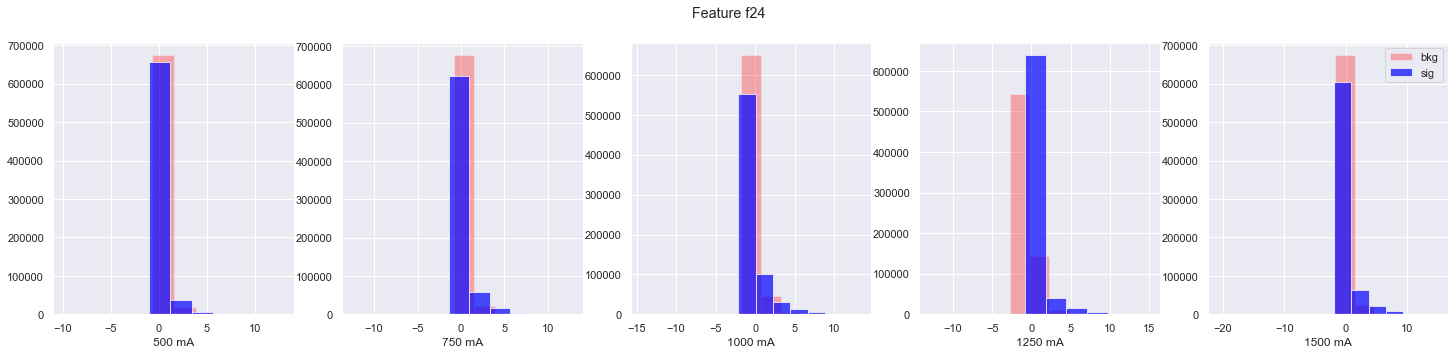

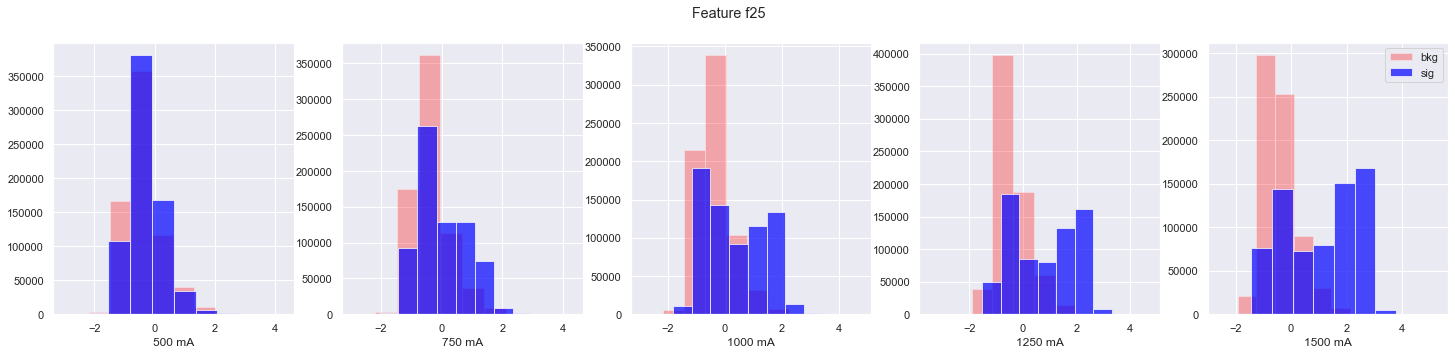

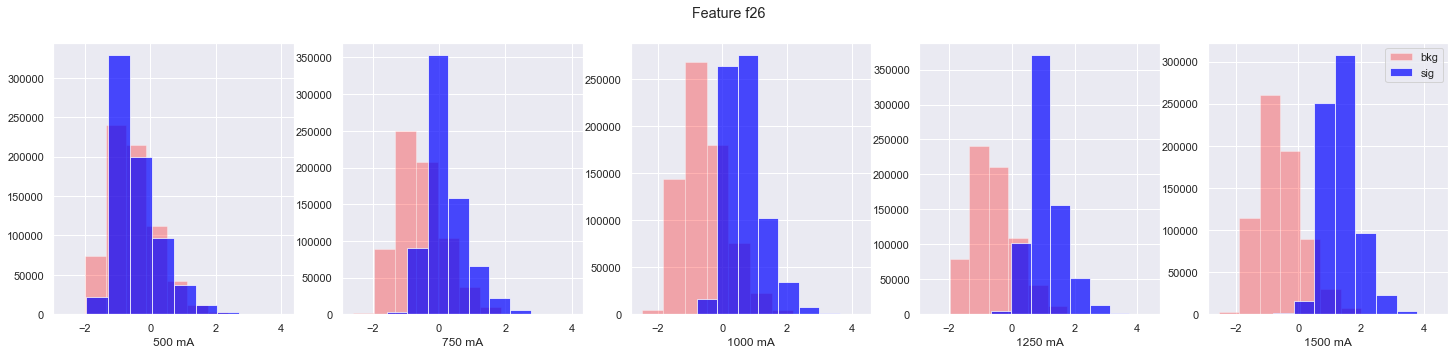

In [93]:
for i, col in enumerate(data.columns['feature']):
    histogram_per_mass(col)

Scatterplot

In [12]:
def scatter(col: str, limit=10_000, seed=utils.SEED):
    mass_bkg = bkg[data.columns['mass']].sample(limit, random_state=seed)
    col_bkg = bkg[col].sample(limit, random_state=seed)
    
    mass_sig = sig[data.columns['mass']].sample(limit, random_state=seed)
    col_sig = sig[col].sample(limit, random_state=seed)
    
    plt.title(f'mA vs {col}')
    plt.scatter(mass_sig, col_sig, alpha=0.7, label='sig', color='blue', marker='s', s=40)
    plt.scatter(mass_bkg, col_bkg, alpha=0.3, label='bkg', color='red', marker='o', s=10)
    
    plt.xlabel('mA')
    plt.ylabel(col)
    plt.legend()

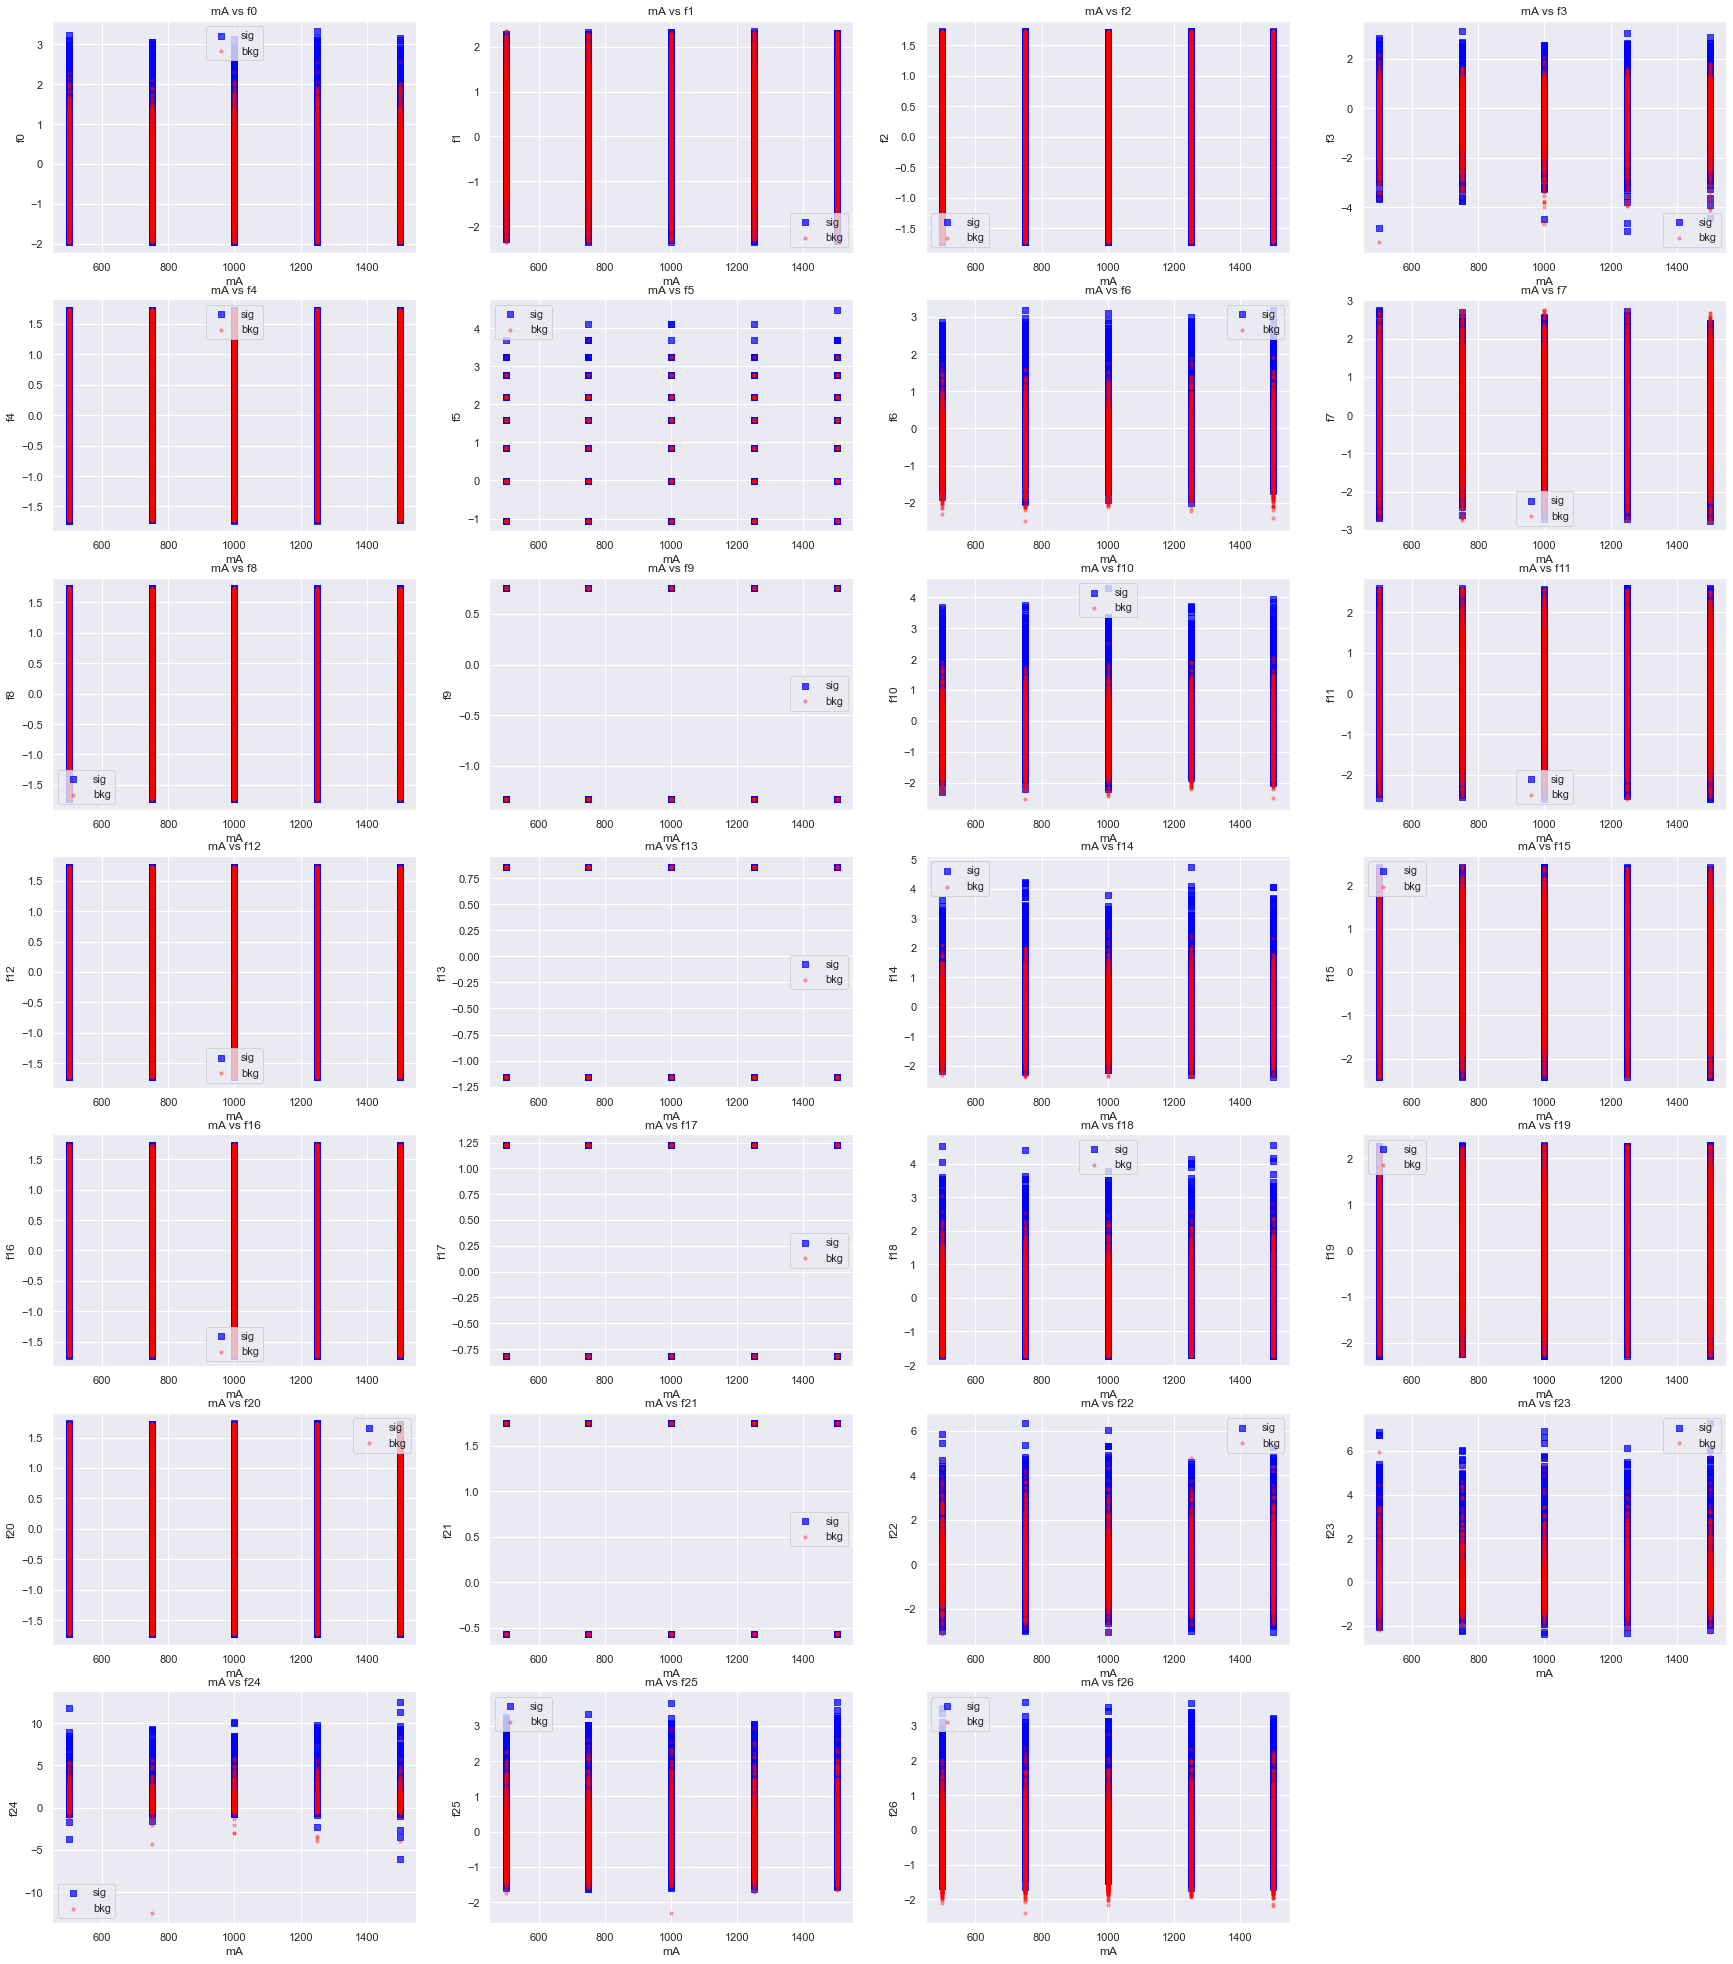

In [13]:
plt.figure(figsize=(30, 35))

for i, col in enumerate(data.columns['feature']):
    plt.subplot(7, 4, i + 1)
    scatter(col)

#### Plot Feature Distribution

<ipython-input-7-937115baafa9>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
<ipython-input-7-937115baafa9>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
<ipython-input-7-937115baafa9>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the r

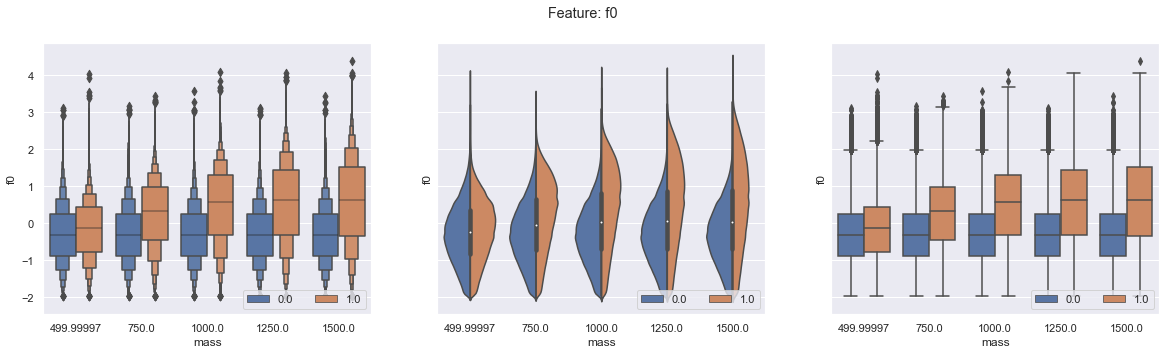

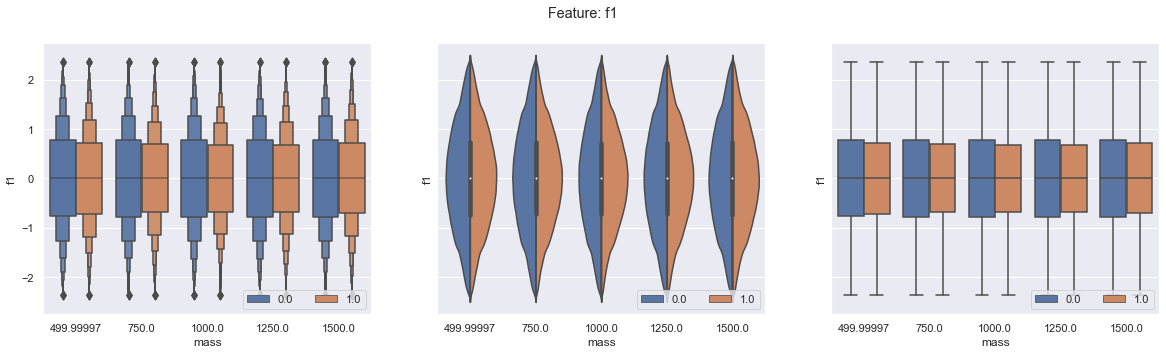

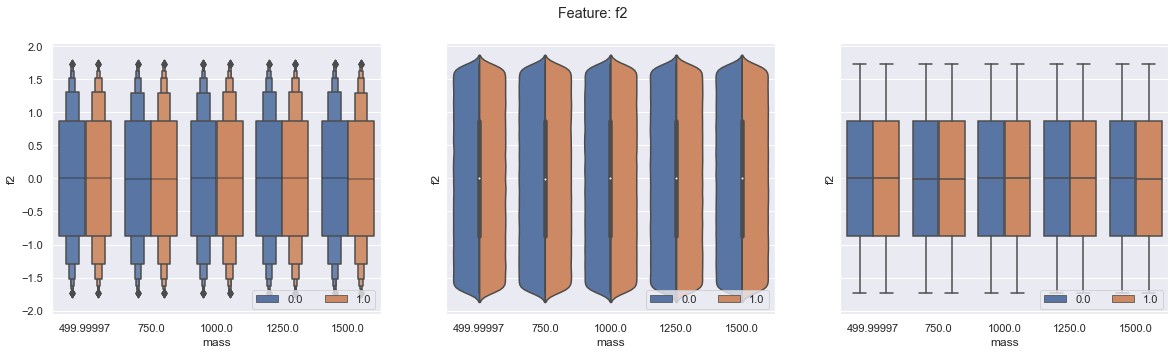

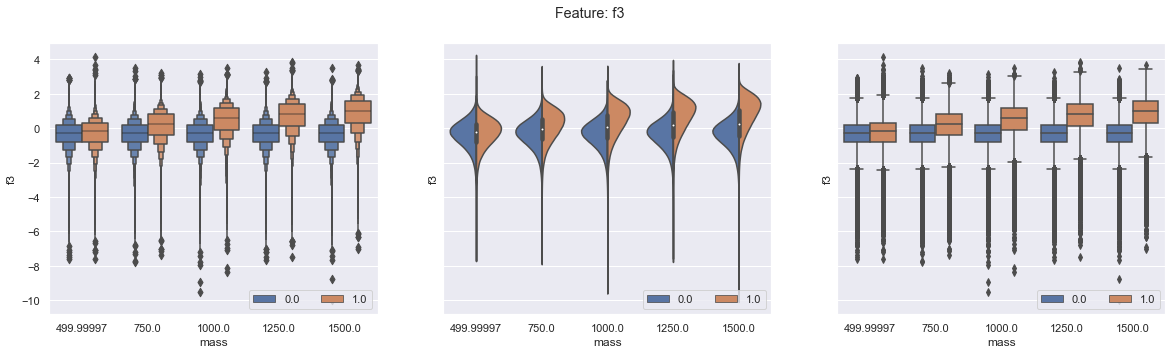

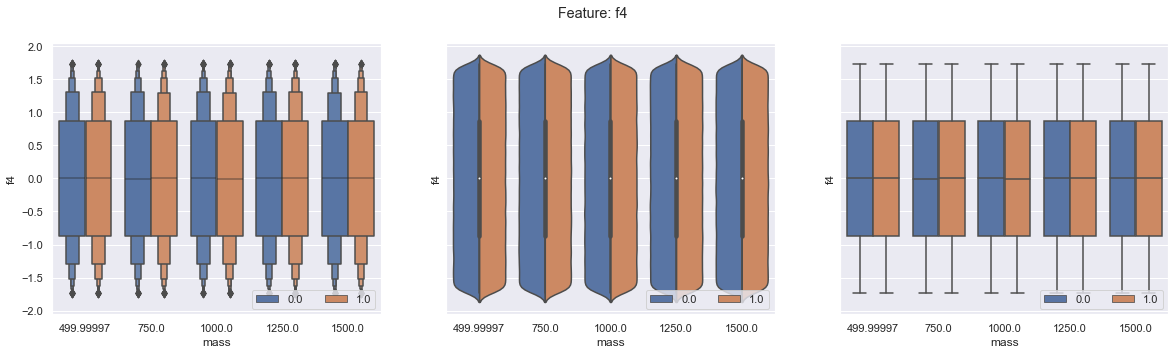

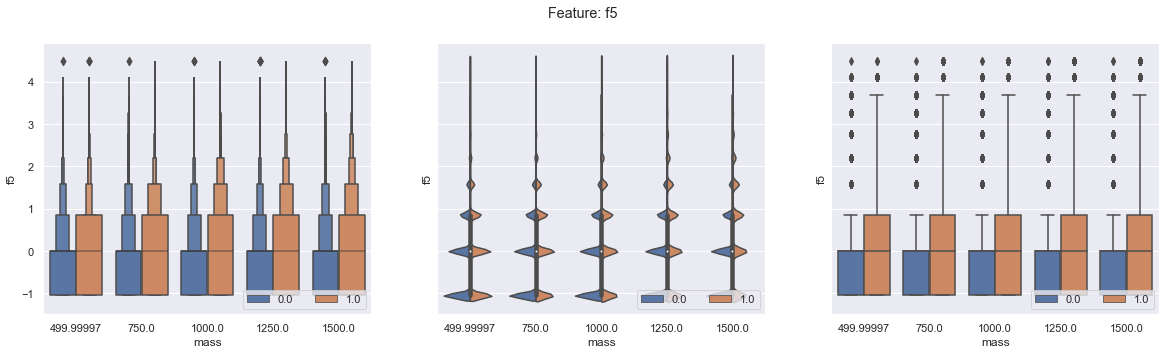

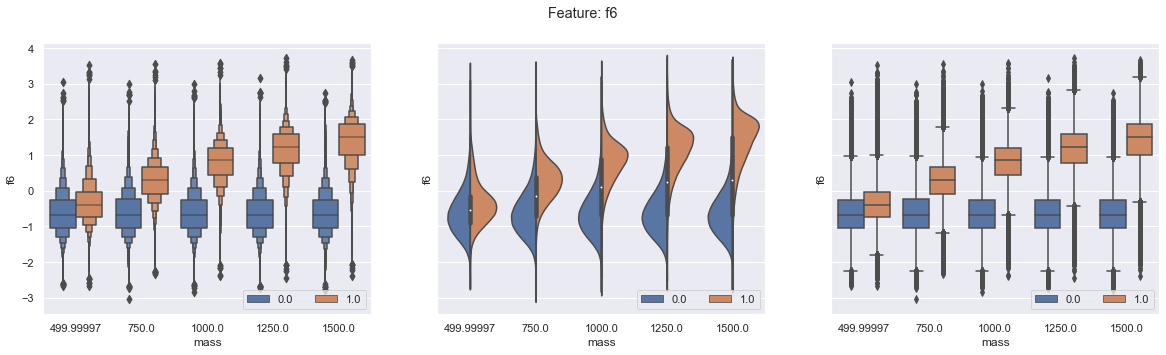

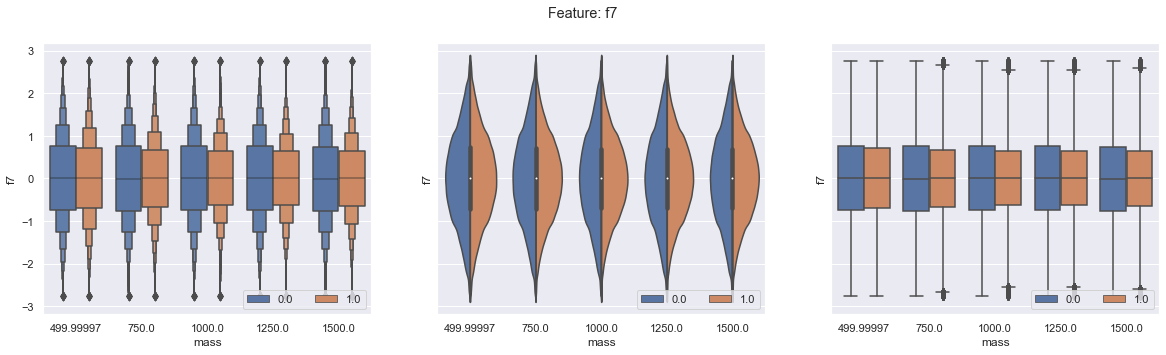

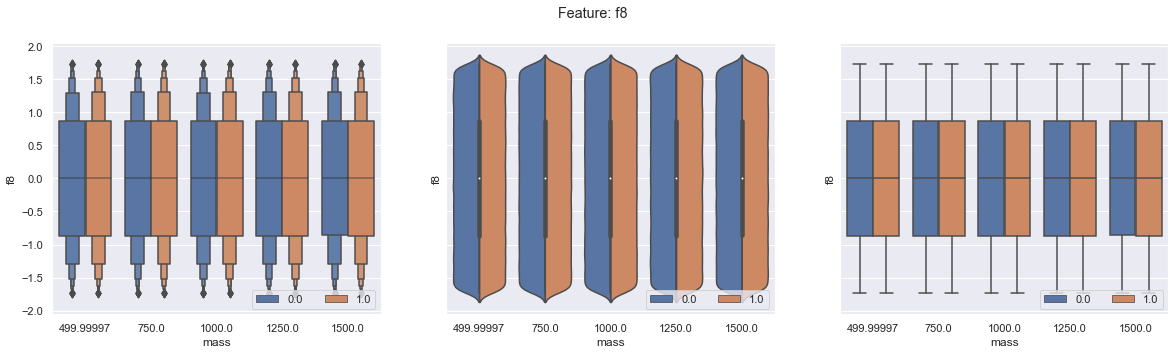

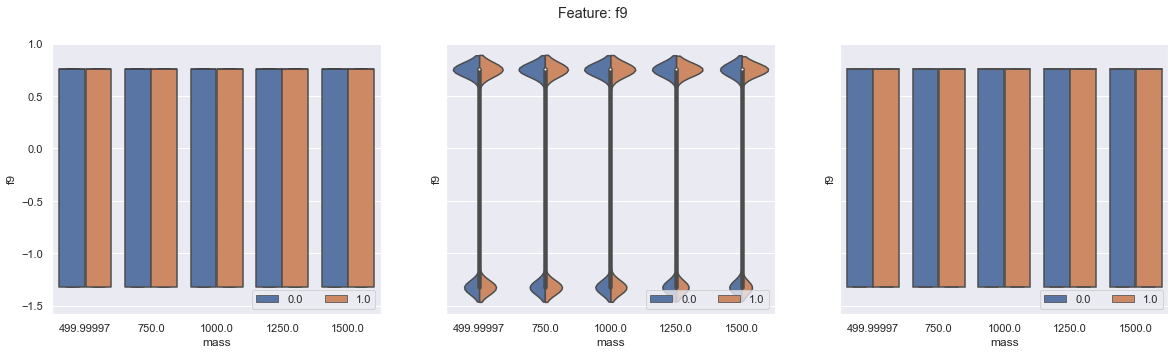

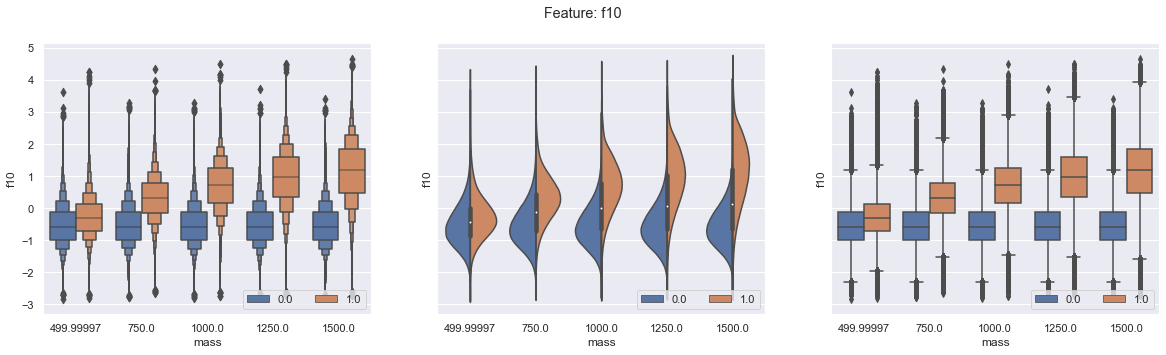

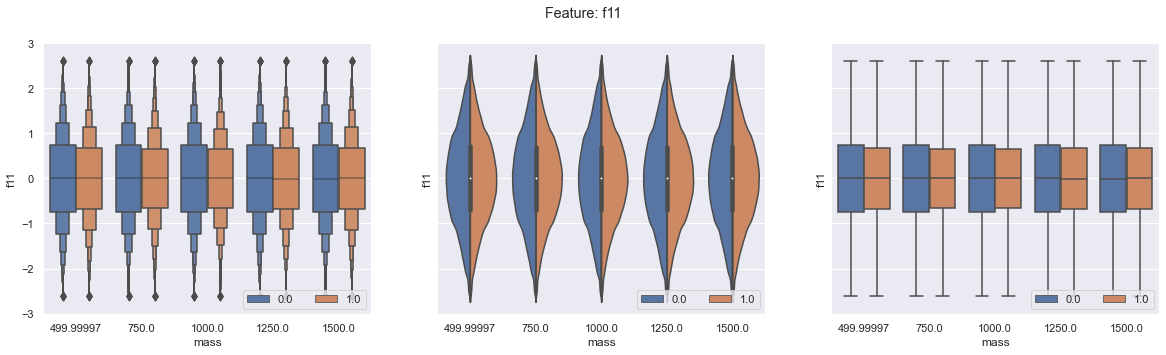

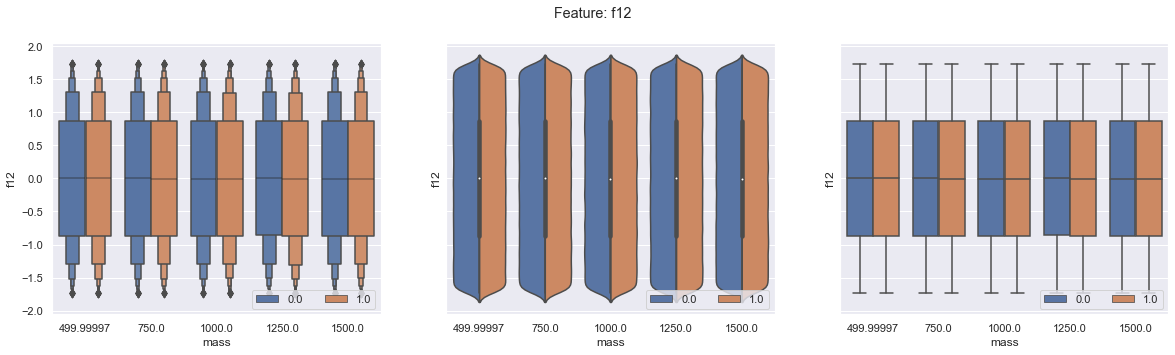

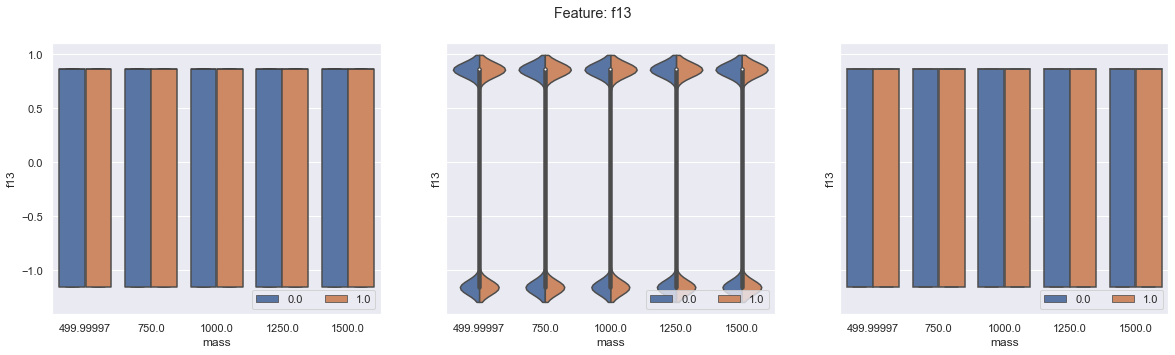

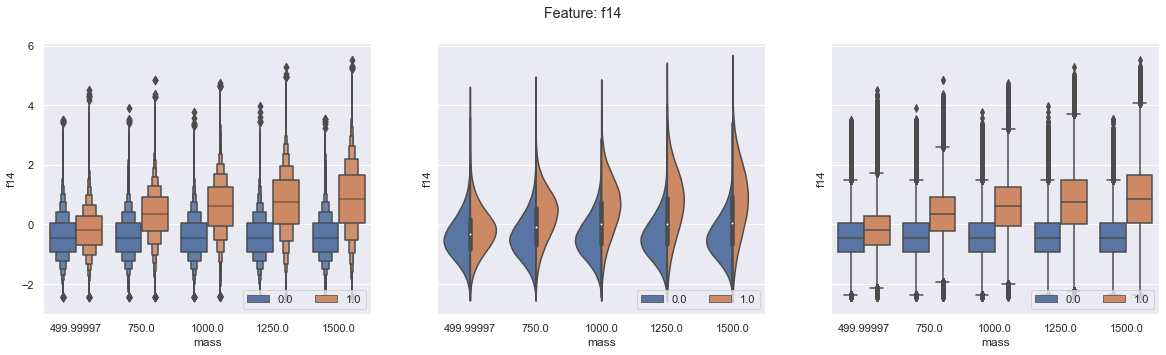

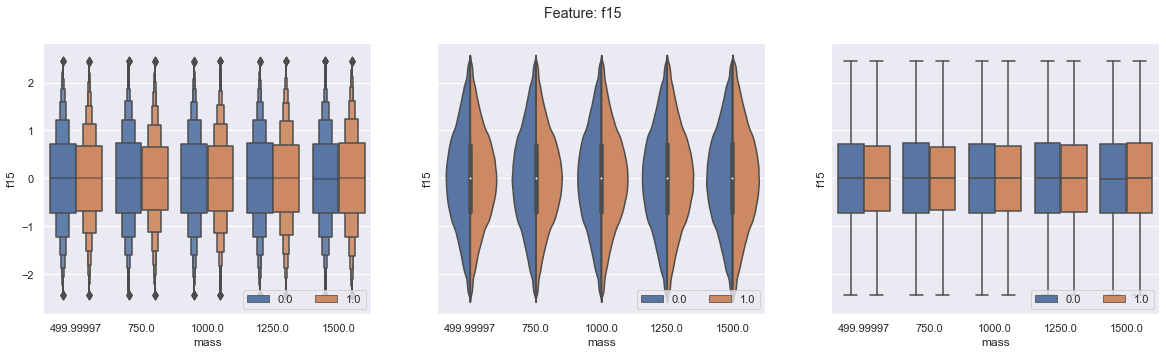

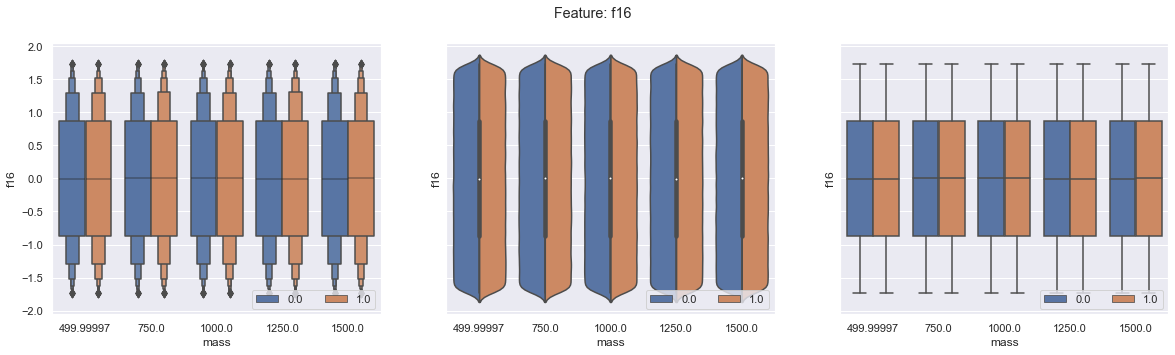

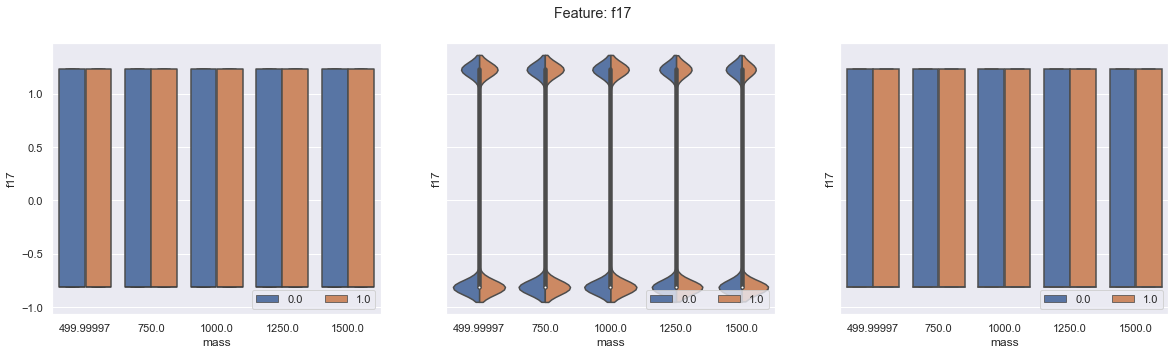

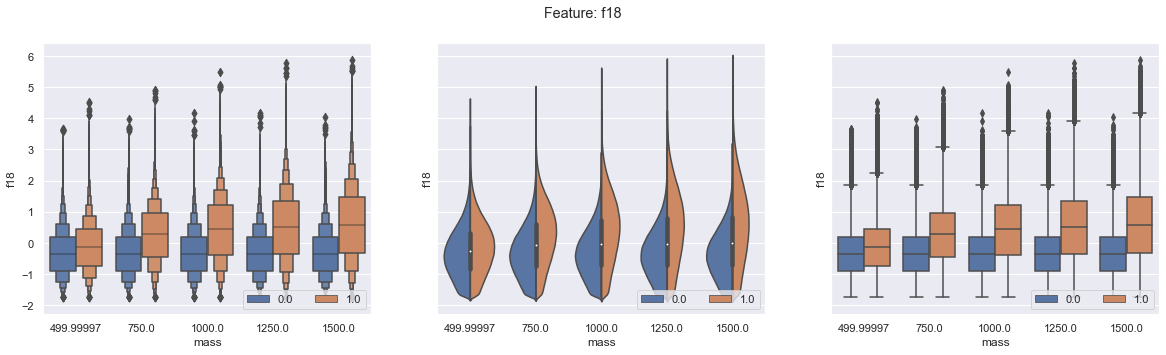

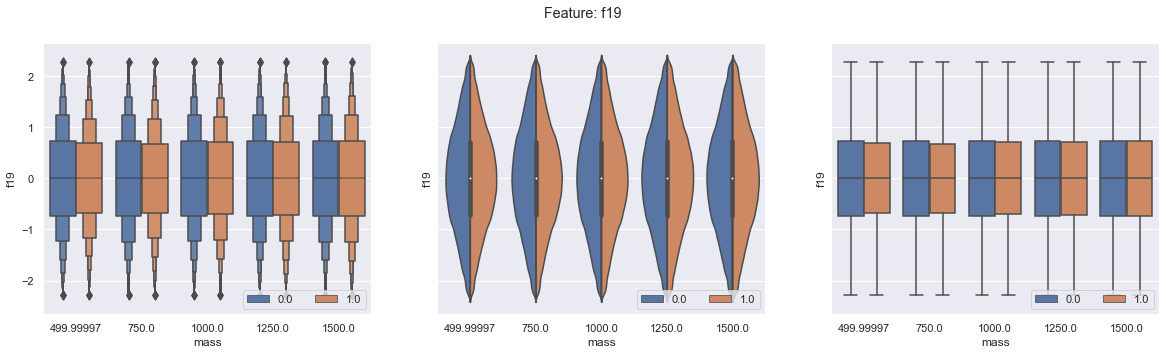

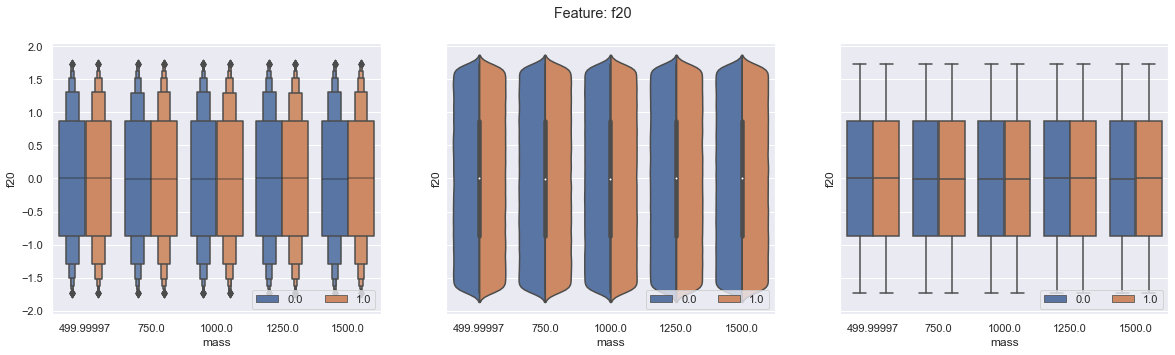

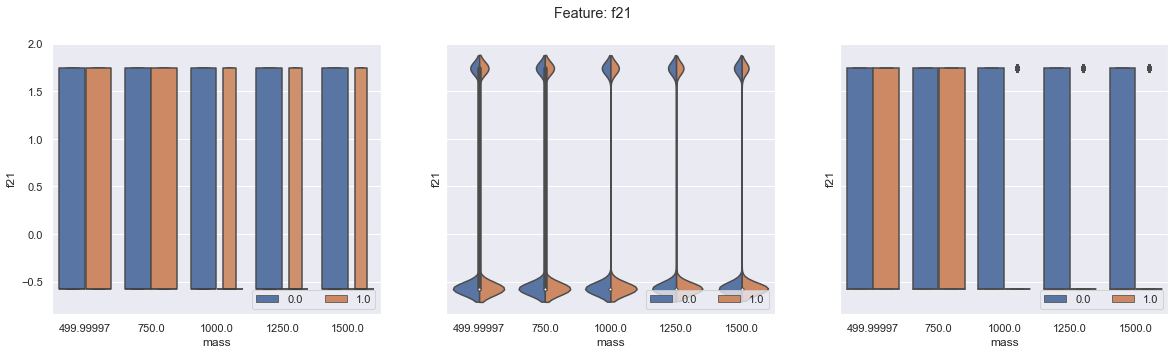

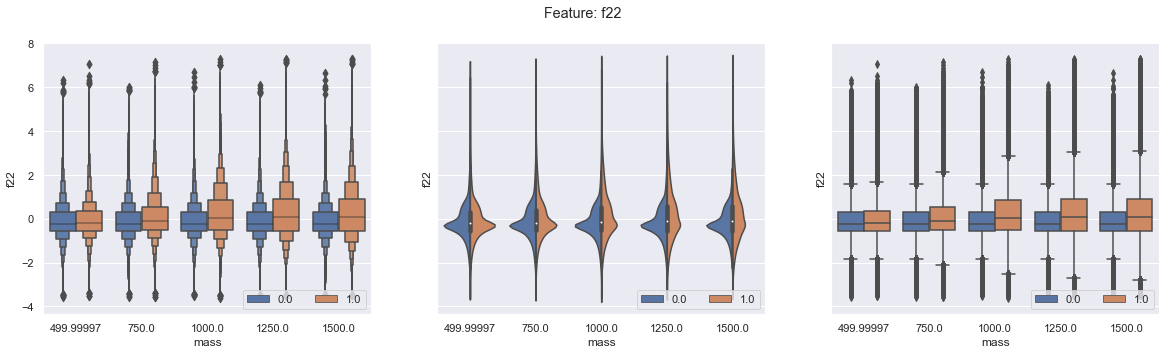

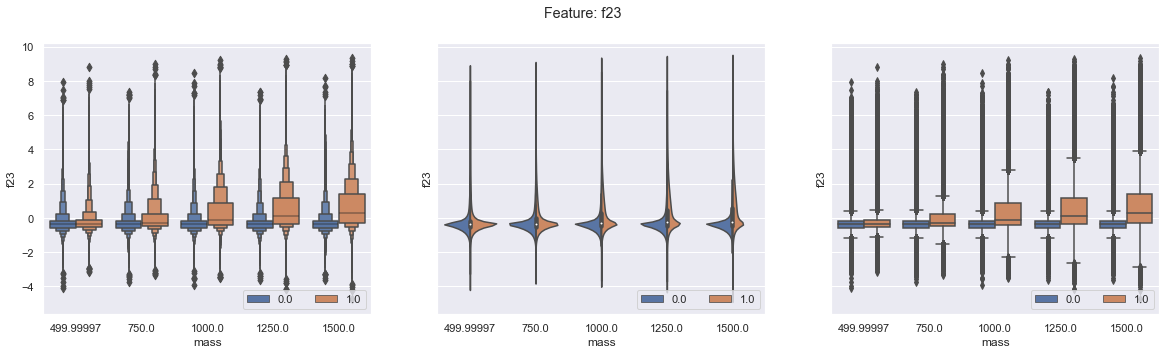

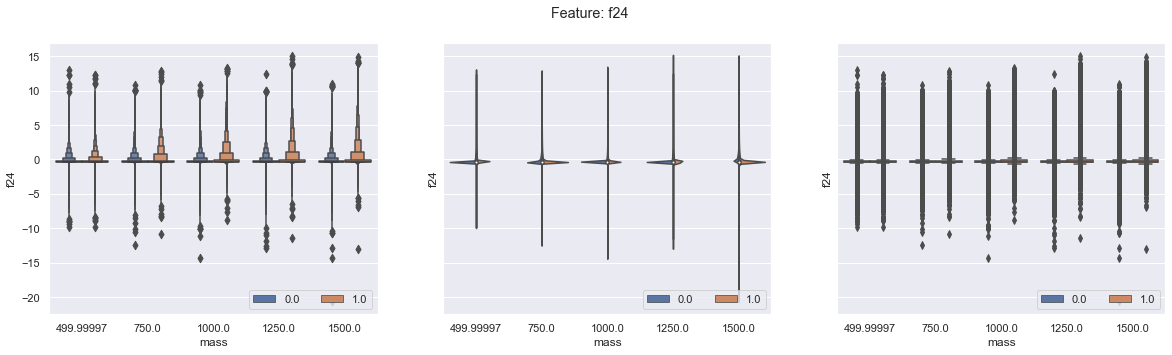

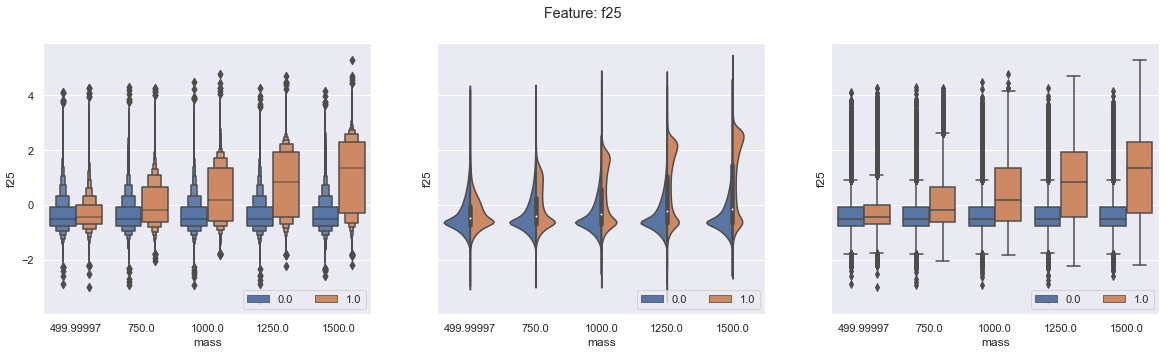

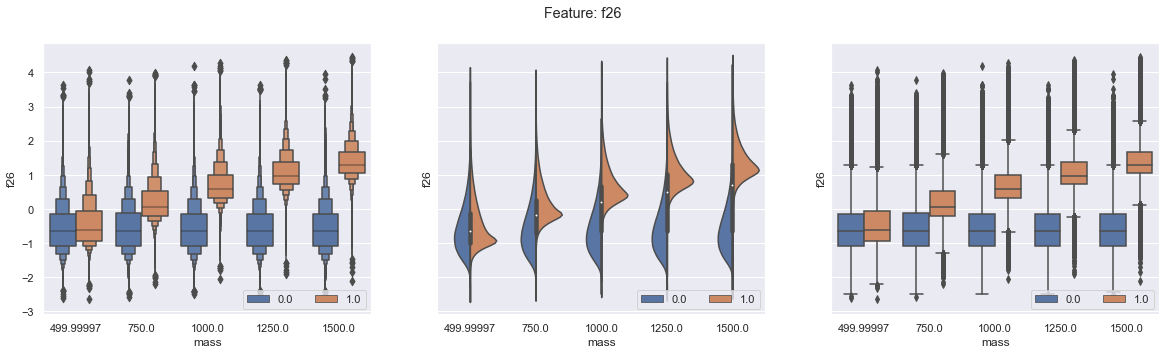

In [7]:
legend_args = dict(loc='lower right', ncol=2)

for col in data.columns['feature']:
    fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
    fig.suptitle(f'Feature {col}')

    plot = sns.boxenplot(x='mass', y=col, hue=data.columns['label'], data=data.ds, ax=axes[0])
    plot.legend(**legend_args)

    plot = sns.violinplot(x='mass', y=col, hue=data.columns['label'], split=True, data=data.ds, ax=axes[1])
    plot.legend(**legend_args)

    plot = sns.boxplot(x='mass', y=col, hue=data.columns['label'], data=data.ds, ax=axes[2])
    plot.legend(**legend_args)
    _ = free_mem()
    

* In general, the distribution of features changes both along mass values and class.
* *bkg* tends to be more distinguishable from *sig* as mass increases.
* For $500 mA$ the feature **distribution looks almost the same** for both *sig* and *bkg* classes. This may explain the **low AUC** values, obtained on such data.

#### Principal Component Analysis

PCA on raw data

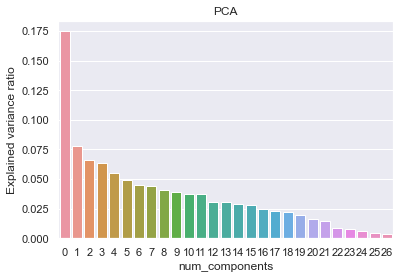

0.3185908759119005

In [7]:
pca = PCA(n_components=data.features.shape[-1], random_state=utils.SEED)
pca.fit(data.features)

utils.pca_plot(pca)

sum(pca.explained_variance_ratio_[:3])

* Each component has some variance, even if little.
* **First feature** f0 has the major variance, seems to confirm that is more important (also considering previous plots).
* Standardizing the data almost results in the same plot: for 3 components kept variance is 31.8% vs 32.0%.

PCA on min-max scaled data

In [14]:
min_max_scaler = MinMaxScaler()
_ = min_max_scaler.fit(data.features)

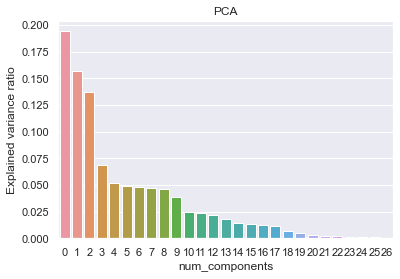

0.48880732992976816

In [12]:
pca_scaled = PCA(n_components=data.features.shape[-1], random_state=utils.SEED)
pca_scaled.fit(min_max_scaler.transform(data.features))

utils.pca_plot(pca_scaled)

sum(pca_scaled.explained_variance_ratio_[:3])

* **Min-max scaling** seems to be beneficial, allowing to retain more variance with less components.